<a href="https://colab.research.google.com/github/gabrielefrn/qc-minicourse/blob/main/Lecture2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

09/04/2024

In [1]:
!pip install numpy
!pip install git+https://github.com/qiboteam/qiboedu
!pip install qibo

  Cloning https://github.com/qiboteam/qiboedu to /tmp/pip-req-build-2pcjbiee
  Running command git clone --filter=blob:none --quiet https://github.com/qiboteam/qiboedu /tmp/pip-req-build-2pcjbiee
  Resolved https://github.com/qiboteam/qiboedu to commit 5de265148000f4e13217a16b535d14ca0b7e3d4a
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.2/258.2 kB 27.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.7/260.7 kB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 53.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.0/524.0 kB 42.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 16.0 MB/s eta 0:00:00
  Created wheel for qiboedu: filename=qiboedu-0.1.0-py3-none-any.whl size=166

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3108, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2901, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 242, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 441, in run
    conflicts = self._determine_conflicts(to_install)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 

In [4]:
import qibo
from qibo import Circuit, gates


from qiboedu.scripts.plotscripts import plot_probabilities_from_state



In [5]:
qibo.set_backend("numpy")

[Qibo 0.2.7|INFO|2024-04-09 17:21:32]: Using numpy backend on /CPU:0
INFO:qibo.config:Using numpy backend on /CPU:0


In [6]:
c = Circuit(2)
c.add(gates.H(0))
c.add(gates.X(1))

print(c())

(0.70711+0j)|01> + (0.70711+0j)|11>


In [8]:
#check T has |2> as egeinvec

c = Circuit(1)
c.add(gates.X(0))
c.add(gates.T(0))
print(c())

(0.70711+0.70711j)|1>


In [17]:
#write and execute circuit function with the possibility of addingg and removing the kickback procedure

def execute_circuit(kickback=True):
  #execute circuit with or without the kickback
  c = Circuit(2)
  c.add(gates.H(0))
  c.add(gates.X(1))

  if kickback:
    c.add(gates.T(1).controlled_by(0))
  c.add(gates.H(0))
  c.add(gates.M(*range(2)))

  outcome = c(nshots=1000)
  return outcome

(1+0j)|01>


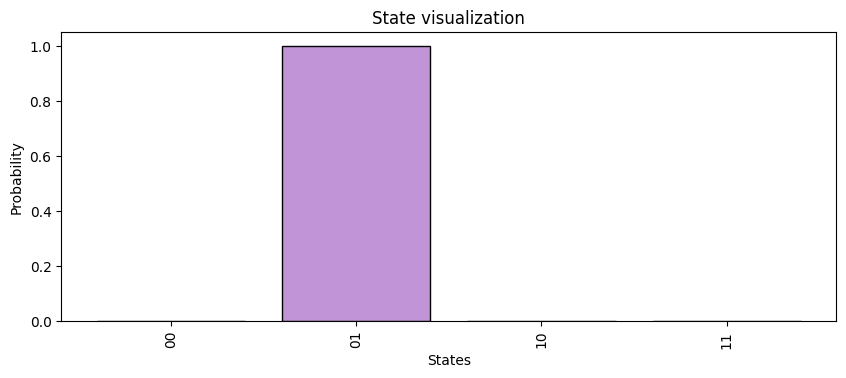

In [12]:
#collect outcome with kickback false
outcome = execute_circuit(kickback=False)

#print state
print(outcome)

#plot prpbabilities
plot_probabilities_from_state(outcome.state())

(0.85355+0.35355j)|01> + (0.14645-0.35355j)|11>


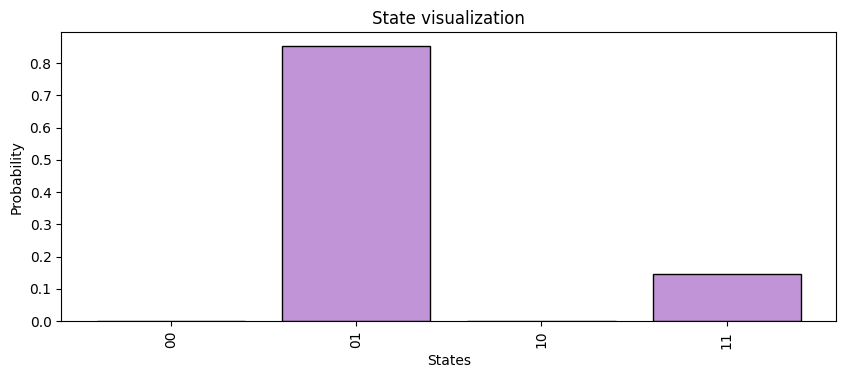

In [16]:
#collect outcome with kickback true
outcome = execute_circuit(kickback=True)

#print state
print(outcome)

#plot prpbabilities
plot_probabilities_from_state(outcome.state())

Exercise: can you find a quantum gate GG

In [20]:
#repeating the kickback many times

#adding recursion using the ntimes argument to the execute_circuit function

def execute_circuit(kickback=False, ntimes=1):
  c = Circuit(2)
  c.add(gates.X(1))

  for i in range(ntimes):
    c.add(gates.H(0))
    if kickback:
      c.add(gates.T(1).controlled_by(0))
    c.add(gates.H(0))

  c.add(gates.M(*range(2)))

  outcome = c(nshots=1000)
  return outcome

(0.14645-0.35355j)|01> + (0.85355+0.35355j)|11>


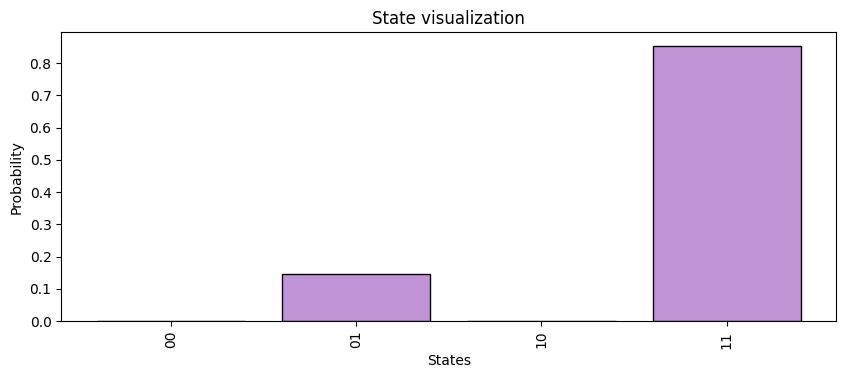

In [29]:
outcome = execute_circuit(kickback=True, ntimes = 0)

print(outcome)
plot_probabilities_from_state(outcome.state())